In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name: LISA VERMA
Roll Number: 220588
IITK Email: lisaverma22@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha=learning_rate,epochs=number of iteratrions)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'
    2. Report the MSE value for your model after training
    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

"""

In [ ]:
##PART-A_I(1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
d=pd.read_csv('data (2).csv')
d.head(10)

,Unnamed: 0,x,y
0,0,2,43.00
1,1,3,55.48
2,2,4,68.08
3,3,5,79.24
4,4,5,79.24
5,5,6,91.24
6,6,8,115.12
7,7,8,115.48
8,8,9,126.52
9,9,10,139.00


In [ ]:
d = d.drop('Unnamed: 0' , axis=1)
d.head()

,x,y
0,2,43.00
1,3,55.48
2,4,68.08
3,5,79.24
4,5,79.24


In [ ]:
## PART A-I(1)

<Axes: xlabel='x', ylabel='y'>

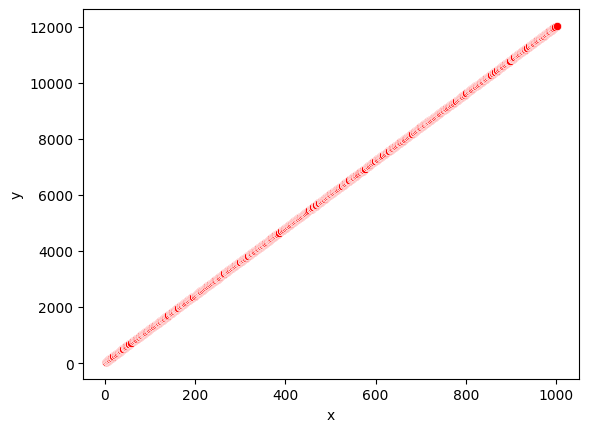

In [ ]:
sns.scatterplot(data=d , x='x' , y='y' ,color = 'Red')

<Axes: xlabel='y', ylabel='Count'>

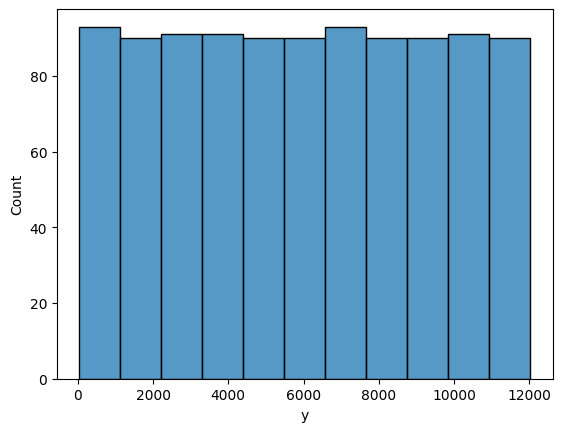

In [ ]:
sns.histplot(data=d['y'])

In [ ]:
##PART-AI(4)
##Clean the data by removing outliers and nan value containing datapoints

In [ ]:
print(d.shape)
d.info()

(999, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       999 non-null    int64  
 1   y       999 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 15.7 KB


<Axes: xlabel='y', ylabel='Count'>

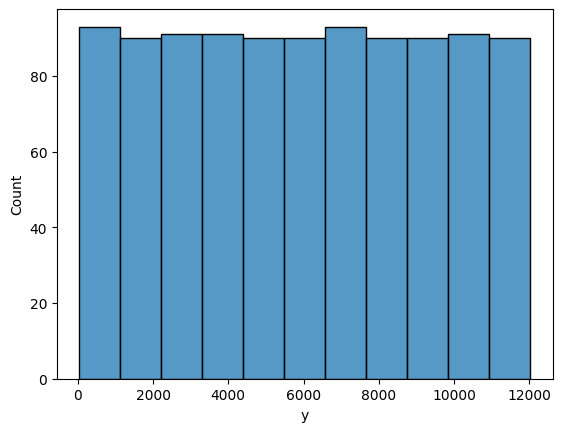

In [ ]:
sns.histplot(d['y'])

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(d['x'] , d['y'] , test_size=0.85 , random_state=42)

In [ ]:
def gradient_descent(x,y,alpha,epochs):
    a = 0.20
    b = 0.15
    m = float(len(x))
    stopping_number = 1e-6 #definenig stopping range
    prev_cost = 0

    for i in range(epochs):
        y_pred = (a*x) + b

        current_cost =  np.sum((y-y_pred)**2) / len(y) #calculating cost function

        if prev_cost and abs(prev_cost - current_cost) <= stopping_number : break

        prev_cost = current_cost

        a_derivative = -(2/m) * sum(x * (y-y_pred)) # Calculating the gradients
        b_derivative = -(2/m) * sum(y-y_pred) # Calculating the gradients
        a = a - (alpha * a_derivative)  #  weights and bias
        b = b - (alpha * b_derivative)  #  weights and bias

    return a,b

#calling the function
a,b = gradient_descent(x_train , y_train , 1e-6 , 100000)
print(f"The value of a is: {a} and b is {b}")

The value of a is: 12.027704088343217 and b is 1.1367689693479375


<Axes: ylabel='Count'>

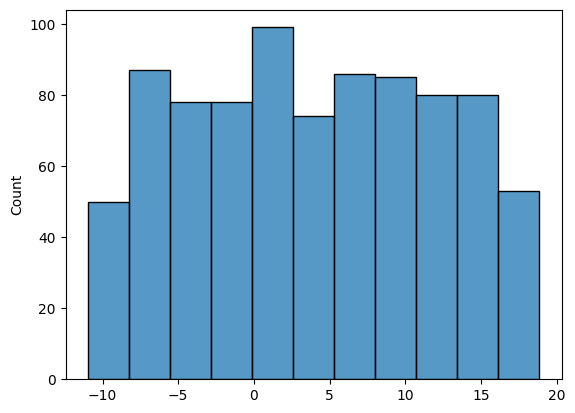

In [ ]:
a = round(a , 4)
b = round(b , 4)

y_pred = (a*x_test) +b
residuals = y_test - y_pred

sns.histplot(residuals)

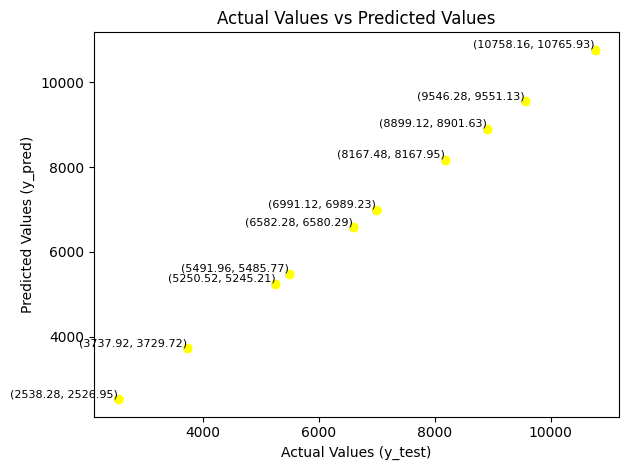

In [ ]:
plt.scatter(y_test.head(10), y_pred.head(10), color='yellow')

for i, (actual, predicted) in enumerate(zip(y_test.head(10), y_pred.head(10))):
    plt.text(actual, predicted, f'({actual:.2f}, {predicted:.2f})', fontsize=8, ha='right', va='bottom')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual Values vs Predicted Values')
plt.tight_layout()

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

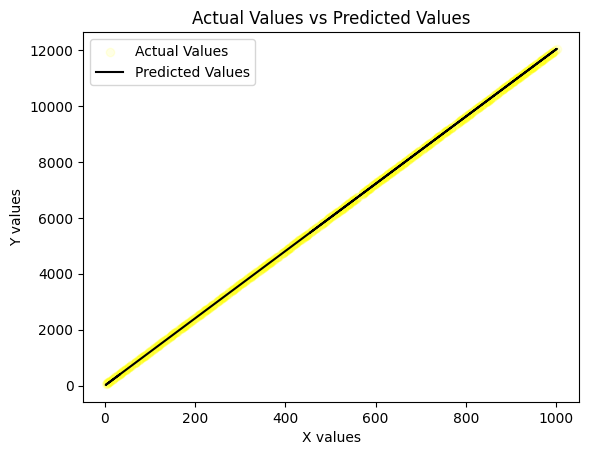

In [ ]:
plt.scatter(x_test, y_test, label='Actual Values', color='yellow' , alpha=0.1)
plt.plot(x_test, y_pred, label='Predicted Values', color='black')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.title('Actual Values vs Predicted Values')

In [ ]:
##PART-B

In [ ]:
##PART-B(1)

In [ ]:
mse =np.sum((y_test-y_pred)**2) / len(y_test)
mse

80.0609390758458